In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
movie=pd.read_csv('movies.csv')

In [80]:
rating=pd.read_csv('ratings.csv')

In [81]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [83]:
movie.shape

(9742, 3)

In [84]:
def getFeatures(genre):
    return " ".join(genre.split('|'))


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=30,stop_words=None)

In [86]:
feature=cv.fit_transform(movie['genres']).toarray()

In [87]:
feature

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
cv.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [89]:
feature.shape


(9742, 24)

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
similarity=cosine_similarity(feature)

[(0, 0.9999999999999999),
 (1706, 0.9999999999999999),
 (2355, 0.9999999999999999),
 (2809, 0.9999999999999999),
 (3000, 0.9999999999999999),
 (3568, 0.9999999999999999),
 (6194, 0.9999999999999999),
 (6486, 0.9999999999999999),
 (6948, 0.9999999999999999),
 (7760, 0.9999999999999999)]

In [93]:
movie_rating=movie.merge(rating,on='movieId')

In [94]:
movie_rating.movieId.value_counts()[0:5]

356     329
318     317
296     307
593     279
2571    278
Name: movieId, dtype: int64

In [95]:
import seaborn as sns

In [96]:
movie.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [97]:
movie_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


# 50 Popular Movies List


In [98]:
movie_rating_counts=movie_rating.groupby('movieId').count()['rating'].reset_index()

In [99]:
movie_rating_mean=movie_rating.groupby('movieId').mean()['rating'].reset_index()

In [100]:
movie_rating_counts.rename(columns={'rating':'ratingCounts'},inplace=True)

In [101]:
movie_rating_mean.rename(columns={'rating':'avgRating'},inplace=True)

In [102]:
popular_movie=movie_rating_mean.merge(movie_rating_counts,on='movieId')

In [103]:
popular_movie.ratingCounts.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: ratingCounts, dtype: float64

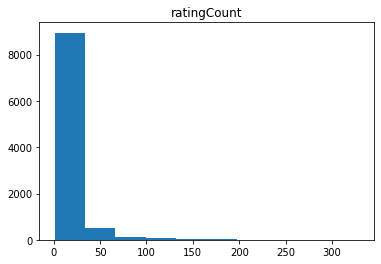

In [104]:
plt.hist(popular_movie['ratingCounts'])
plt.title('ratingCount')
plt.show()

In [105]:
popular_movie=popular_movie[popular_movie['ratingCounts']>140]

In [106]:
popular_movie=popular_movie.sort_values('avgRating',ascending=False).head(50)

In [107]:
popular_movie=popular_movie.merge(movie,on='movieId')

In [108]:
popular_movie

,movieId,avgRating,ratingCounts,title,genres
0,318,4.429022,317,"Shawshank Redemption, The (1994)",Crime|Drama
1,858,4.289062,192,"Godfather, The (1972)",Crime|Drama
2,2959,4.272936,218,Fight Club (1999),Action|Crime|Drama|Thriller
3,58559,4.238255,149,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
4,50,4.237745,204,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1197,4.232394,142,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
6,260,4.231076,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
7,527,4.225000,220,Schindler's List (1993),Drama|War
8,1196,4.215640,211,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
9,1198,4.207500,200,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure


In [109]:
movie_year=movie['title'].str.split('(').str[-1].str[:-1]

In [110]:
movie_year

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: title, Length: 9742, dtype: object

In [111]:
movie['movie_year']=movie_year

In [112]:
movie['title']=movie['title'].str.split('(').str[0].str[:-1]

In [113]:
movie

,movieId,title,genres,movie_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


# 10 years with most released movies

<AxesSubplot:>

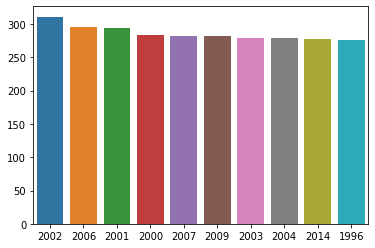

In [114]:
top_20_years=movie['movie_year'].value_counts()[:10]
sns.barplot(x=top_20_years.index,y=top_20_years.values)

# Collaborative filtering recommendation system

In [115]:
movie_rating['title']=movie_rating['title'].str.split("(").str[0].str[:-1]

In [116]:
x=movie_rating.groupby('userId').count()['rating']>=40
considered_user=x[x].index
considered_user

Int64Index([  1,   4,   5,   6,   7,   8,   9,  10,  11,  14,
            ...
            600, 601, 602, 603, 604, 605, 606, 607, 608, 610],
           dtype='int64', name='userId', length=428)

In [117]:
filtered_rating=movie_rating[movie_rating['userId'].isin(considered_user)]

In [118]:
filtered_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint,Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184,3.5,1537110021


In [119]:
y=movie_rating.groupby('movieId').count()['rating']>40
considered_movie=y[y].index
filtered_rating=filtered_rating[filtered_rating['movieId'].isin(considered_movie)]

In [120]:
filtered_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
98926,134853,Inside Out,Adventure|Animation|Children|Comedy|Drama|Fantasy,567,2.0,1525284843
98927,134853,Inside Out,Adventure|Animation|Children|Comedy|Drama|Fantasy,586,5.0,1529903054
98928,134853,Inside Out,Adventure|Animation|Children|Comedy|Drama|Fantasy,596,4.5,1535709490
98929,134853,Inside Out,Adventure|Animation|Children|Comedy|Drama|Fantasy,601,5.0,1521397599


In [121]:
pt=filtered_rating.pivot_table(index='title',columns='userId',values='rating')

In [122]:
pt.fillna(0,inplace=True)

In [123]:
collaborative_similarity=cosine_similarity(pt)

In [124]:
collaborative_similarity

array([[1.        , 0.30337076, 0.23170535, ..., 0.13185228, 0.43327183,
        0.31558869],
       [0.30337076, 1.        , 0.35204844, ..., 0.2058228 , 0.25677098,
        0.36763856],
       [0.23170535, 0.35204844, 1.        , ..., 0.29199339, 0.26427798,
        0.37770834],
       ...,
       [0.13185228, 0.2058228 , 0.29199339, ..., 1.        , 0.26364512,
        0.2953587 ],
       [0.43327183, 0.25677098, 0.26427798, ..., 0.26364512, 1.        ,
        0.37313325],
       [0.31558869, 0.36763856, 0.37770834, ..., 0.2953587 , 0.37313325,
        1.        ]])

In [125]:
def recommend(movie_name):
    index=np.where(pt.index == movie_name)[0][0]
    similar_movies=sorted(list(enumerate(collaborative_similarity[index])),key= lambda x: x[1],reverse=True)[1:6]
    
    for s in similar_movies:
        print(pt.index[s[0]])

In [126]:
np.where(pt.index=='Inside Out')

(array([294], dtype=int64),)

In [155]:
recommend('10 Thing')

Wedding Singer, The
Grease
Sixteen Candles
Bridget Jones's Diary
Legally Blonde


In [129]:
pt

userId,1,4,5,6,7,8,9,10,11,14,...,600,601,602,603,604,605,606,607,608,610
title,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
You've Got Mail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,3.5,0.0,0.0,0.0
Young Frankenstein,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,5.0,0.0,0.0,3.5,0.0,0.0,0.0


# Content Based Recommendation


In [146]:
def recommendOnContent(movieName):
    index=movie[movie['title']==movieName].index[0]
    similar_list=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])[0:6]
    for s in similar_list:
         print(movie.iloc[s[0]].title)

In [156]:
recommendOnContent("10 Things I Hate About You")


Grumpier Old Men
Sabrina
Clueless
Two if by Sea
French Twist
If Lucy Fell
